### Ibrahim AbuAlhaol, Sr. Data Scientest, Larus Technologies,  Ottawa, Canada, SEP 20, 2018

- **LSTM** Modeling and forcasting of Average Vessel Service Time (VST) for port of Singapore 


---------------

### import Libraries 

In [1]:
# Utilities 
import os, time, datetime
import pickle
import random 
from tqdm import tqdm

# numpy 
import numpy as np

#Geohash
import pygeohash as pgh


# Diabale warning
import warnings
warnings.filterwarnings('ignore')



# Matplotlib
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

# Pandas
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot




# Scipy
from scipy.stats.stats import pearsonr

# SK-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

# seaborn 
import seaborn as sns

# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



ModuleNotFoundError: No module named 'keras'

----------------------

### Port of Interest 

In [6]:
PortName='Singapore'


#### Load Data 
- 1 hour aggreagtion
- 2 hours aggregation 
- 4 hours aggregation 
- 6 hours aggregation 
- 8 hours aggregation 

In [3]:
DF_1h=pd.read_csv('1h_aggregation.csv')
DF_2h=pd.read_csv('2h_aggregation.csv')
DF_4h=pd.read_csv('4h_aggregation.csv')
DF_6h=pd.read_csv('6h_aggregation.csv')
DF_8h=pd.read_csv('8h_aggregation.csv')


In [30]:
def CorrPlot(DF,Name):
    sns.set(palette='deep')
    sns.set_style('whitegrid')

    # calculate the correlation matrix
    #DF.rename(columns={'Service_Time': 'Service Time'}, inplace=True)
    corr = DF.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(8, 8))
    #plt.title(title)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 125, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .75} ,annot=True)
    plt.savefig(f'Correlation_{Name}.png')

### Pearson Correlation Plots 

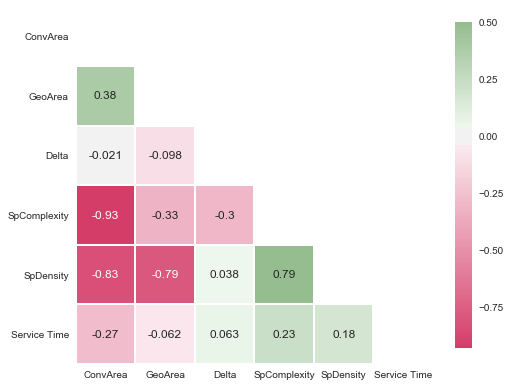

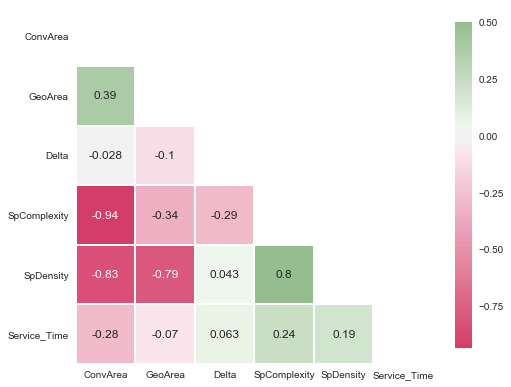

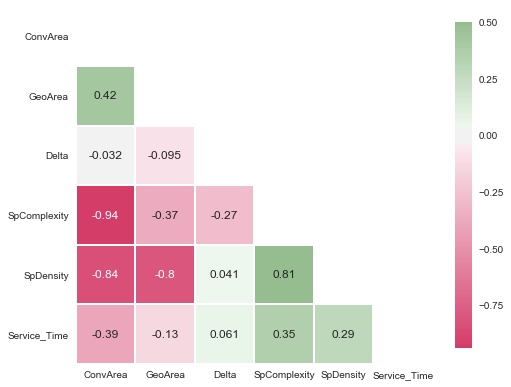

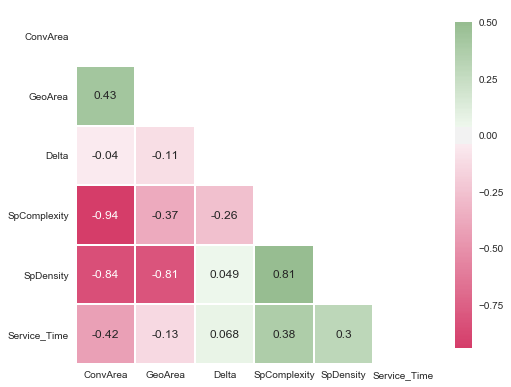

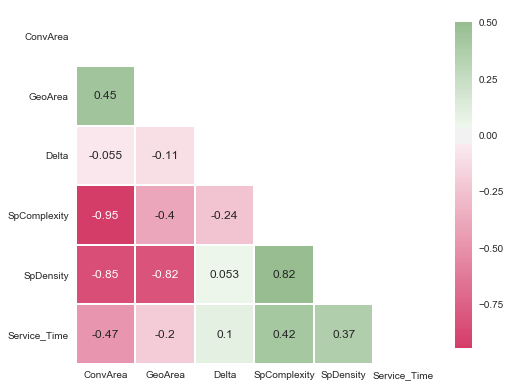

In [31]:
CorrPlot(DF_1h.drop(['Bucket','Month'],axis=1),Name=f'{PortName}_correlation_with 1Hours_aggreagation')
CorrPlot(DF_2h.drop(['Bucket','Month'],axis=1),Name=f'{PortName}_correlation_with 2Hours_aggreagation')
CorrPlot(DF_4h.drop(['Bucket','Month'],axis=1),Name=f'{PortName}_correlation_with 4Hours_aggreagation')
CorrPlot(DF_6h.drop(['Bucket','Month'],axis=1),Name=f'{PortName}_correlation_with 6Hours_aggreagation')
CorrPlot(DF_8h.drop(['Bucket','Month'],axis=1),Name=f'{PortName}_correlation_with 8Hours_aggreagation')

### Ploting the time Series 

In [36]:
from matplotlib import pyplot

def PlotingTimeSeries(DF,title):
    kwd2={'linewidth':2.0,'color':'blue'}
    sns.set_style('whitegrid')
    # Value
    #DF.rename(columns={'Service_Time': 'Service Time'}, inplace=True)
    # Value
    groups = [0, 1, 2, 3, 4 ,5,6 ]
    #titles=['Month Index','$Km^2$','$Km^2$','m','$\dfrac{1}{m} x \dfrac{1}{Km^2}$','$\dfrac{1}{Km^2} x \dfrac{1}{Km^2}$','Hours']
    titles=['Month Index','Km 2','Km2','m','1/(m x Km2)','1/Km2 x 1/Km2','Hours']
    i = 1
    # plot each column
    pyplot.figure(figsize=(20,15))
    for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(DF.values[:, group],**kwd2)
        pyplot.title(DF.columns[group], y=0.5, loc='right')
        pyplot.ylabel(f'{titles[i-1]}',fontsize='x-large')
        if i==7:
            pyplot.xlabel(f'Time Index',fontsize='x-large')

        i += 1
    pyplot.savefig(f'TimeSeries_{title}.png')
    pyplot.show()



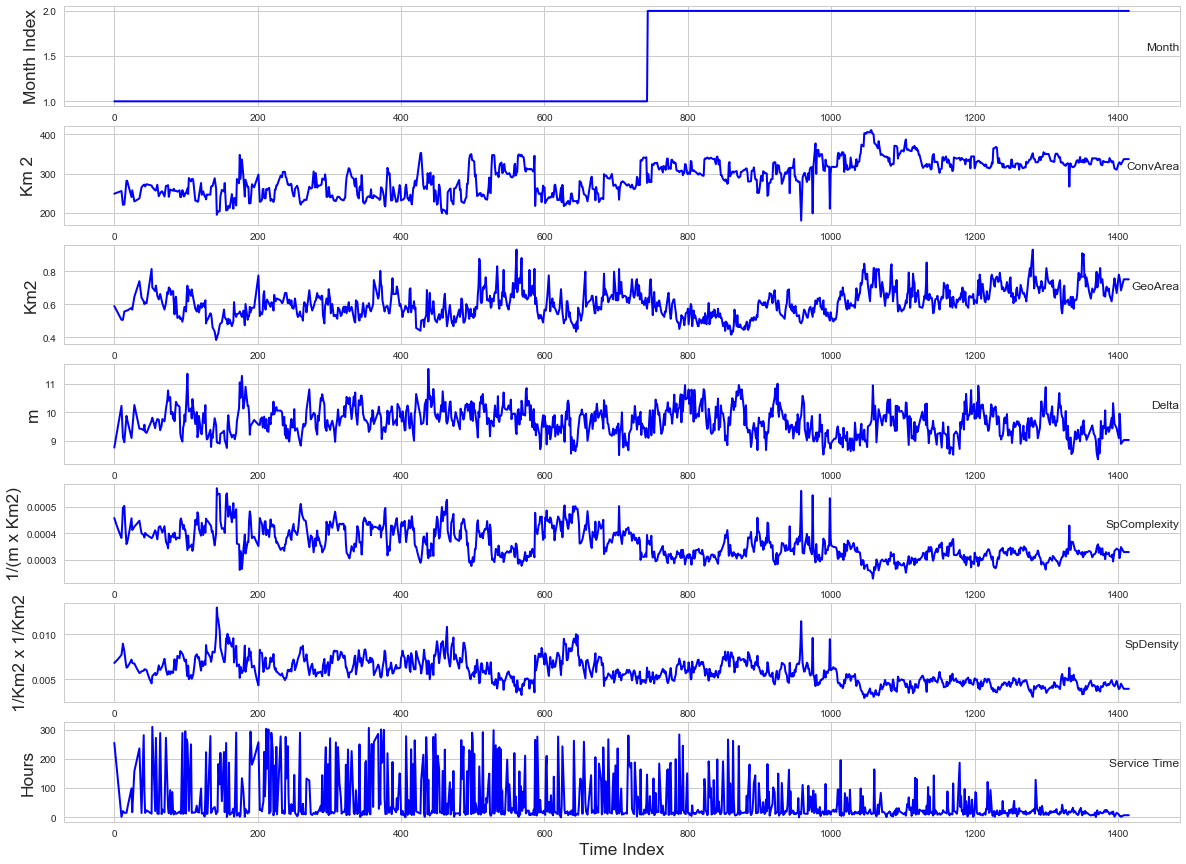

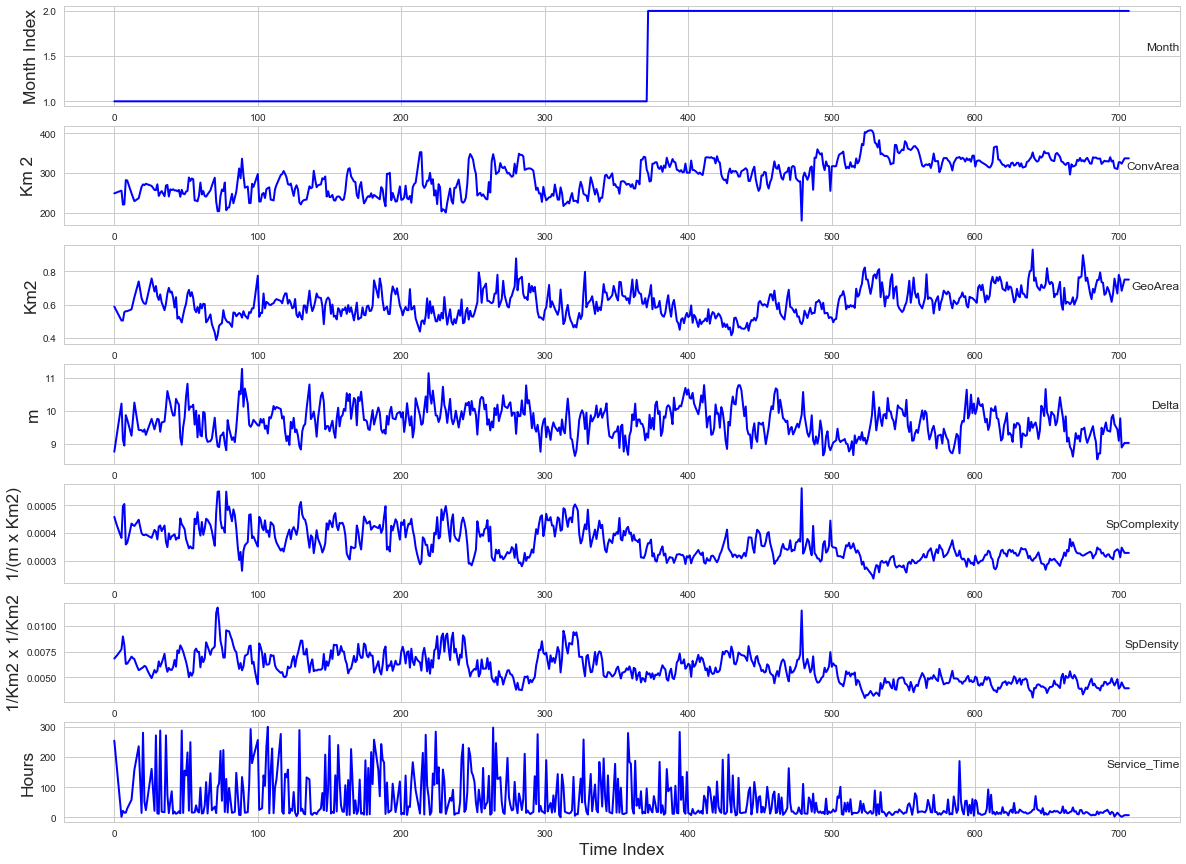

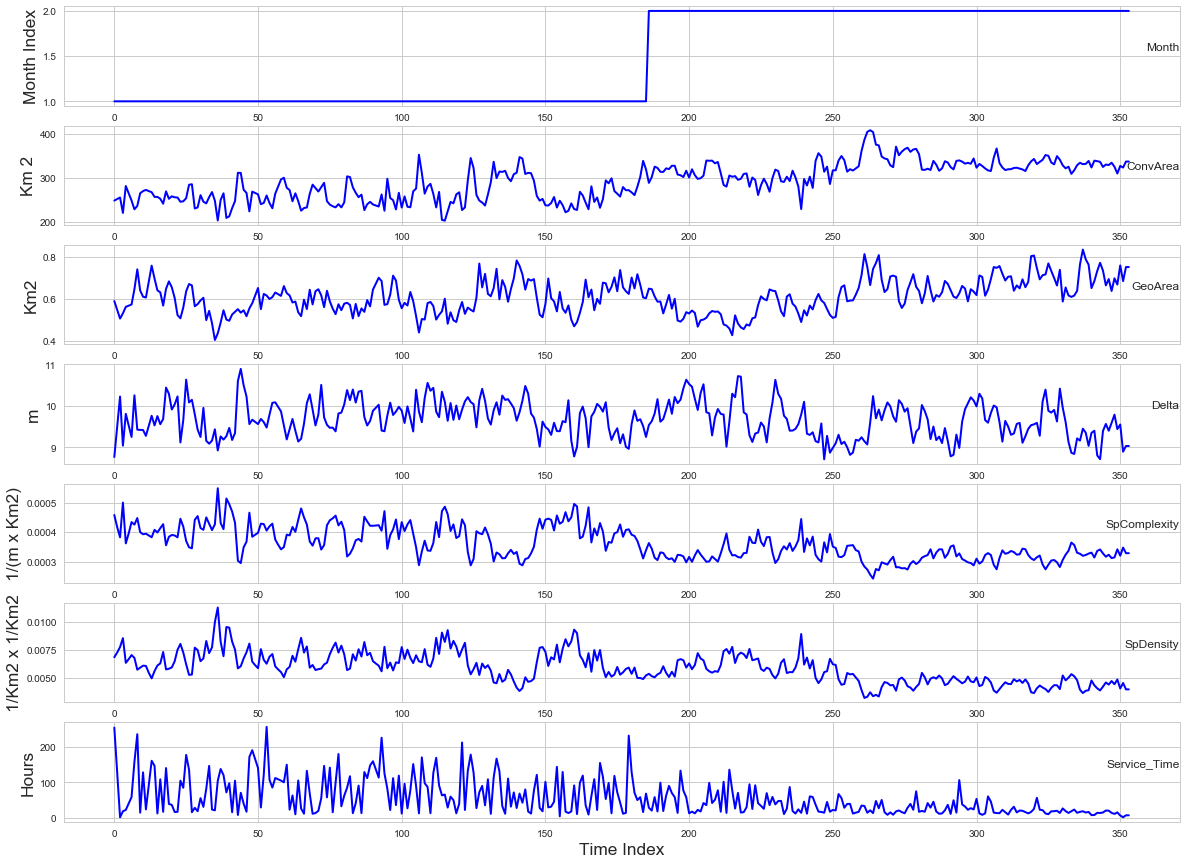

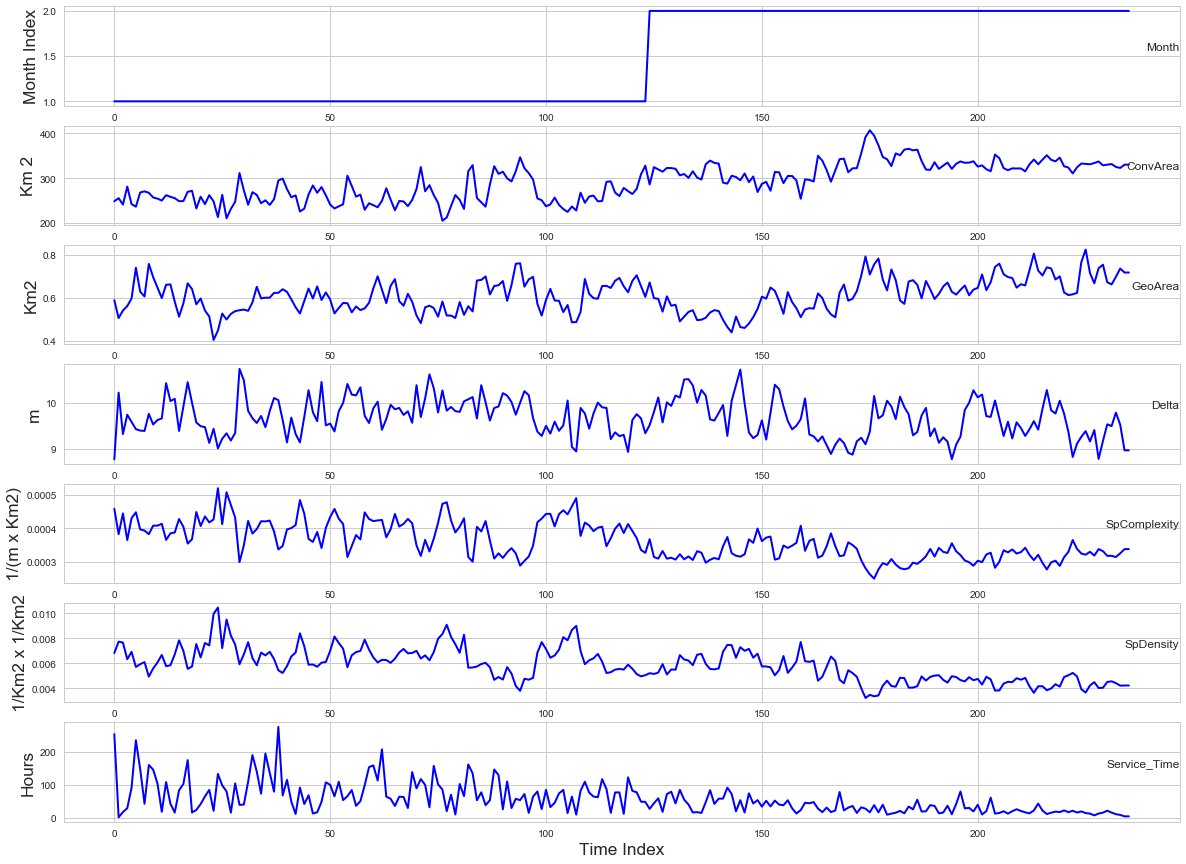

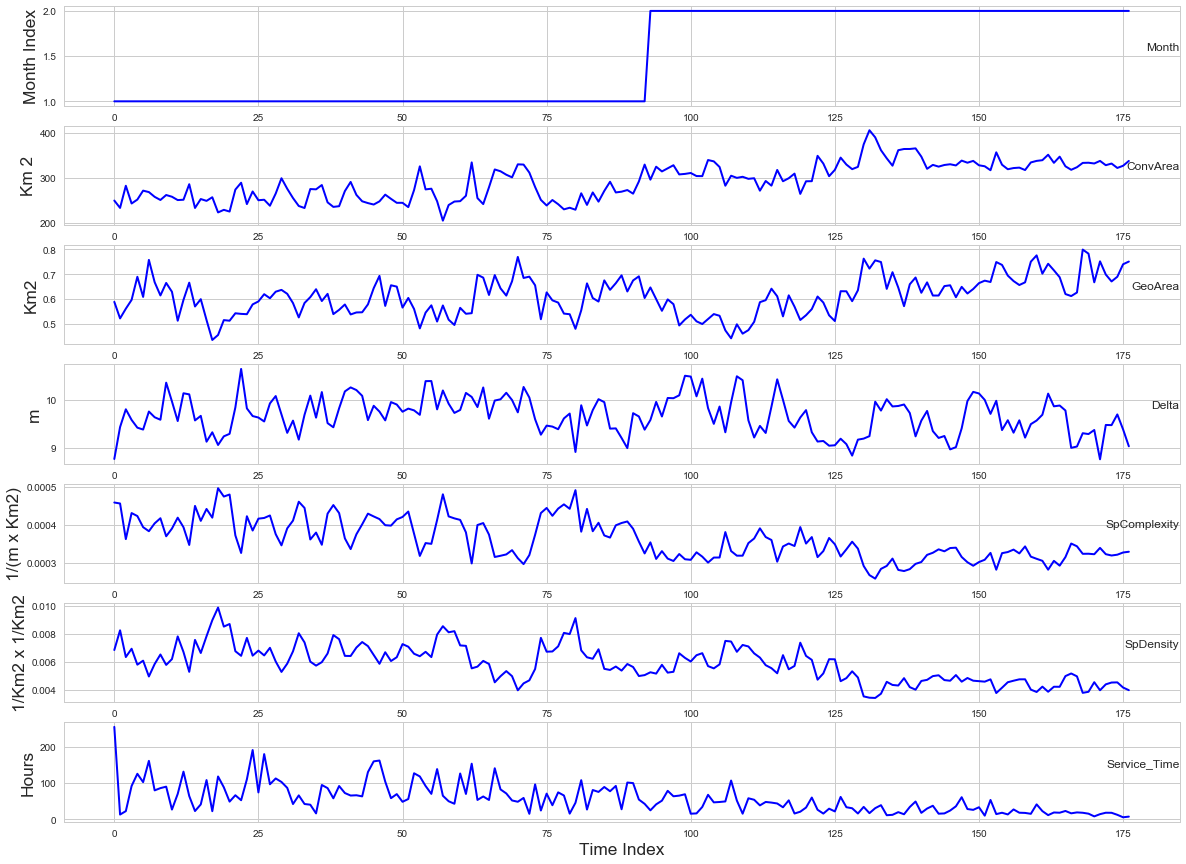

In [39]:
PlotingTimeSeries(DF_1h.drop(['Bucket'],axis=1),title='One hours aggregation')
PlotingTimeSeries(DF_2h.drop(['Bucket'],axis=1),title='Two hours aggregation')
PlotingTimeSeries(DF_4h.drop(['Bucket'],axis=1),title='Four hours aggregation')
PlotingTimeSeries(DF_6h.drop(['Bucket'],axis=1),title='Six hours aggregation')
PlotingTimeSeries(DF_8h.drop(['Bucket'],axis=1),title='Eight hours aggregation')

In [43]:
def AutoCorrelationPlot(DF,title):
    sns.set_style('whitegrid')  
    pyplot.figure(figsize=(20,10))
    autocorrelation_plot(DF['Service Time'])
    pyplot.title(f'Service Time [{title}]')
    pyplot.grid()
    # labels appear outside of plot area, so auto-adjust
    pyplot.tight_layout()
    pyplot.show()
    


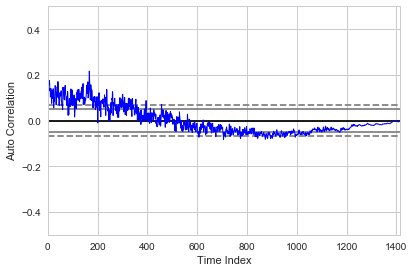

In [44]:
kwd2={'linewidth':1.0,'color':'blue'}
autocorrelation_plot(DF_1h['Service Time'],**kwd2)
plt.xlabel('Time Index')
plt.ylabel('Auto Correlation')
plt.grid()
plt.tight_layout()
plt.ylim([-.5,.5])
plt.savefig('Singapore_autocorrlation_1agg.png')
plt.show()


,Bucket,Month,ConvArea,GeoArea,Delta,SpComplexity,SpDensity,Service_Time
0,1,1,248.848028,0.589046,8.767454,0.000458,0.006822,254.502696
1,2,1,250.221991,0.572405,9.059073,0.000441,0.006982,203.932045
2,3,1,251.595955,0.555764,9.350693,0.000425,0.007152,153.361395
3,4,1,252.969918,0.539123,9.642312,0.000410,0.007332,102.790745
4,5,1,254.343882,0.522482,9.933932,0.000396,0.007525,52.220095
5,6,1,255.717845,0.505841,10.225551,0.000382,0.007731,1.649444
6,7,1,220.511945,0.505789,9.129909,0.000497,0.008966,21.408750
7,8,1,221.294580,0.555860,8.953373,0.000505,0.008130,15.710370
8,9,1,282.170843,0.561592,9.875480,0.000359,0.006311,15.483611
9,10,1,281.372188,0.561556,9.742884,0.000365,0.006329,29.250556


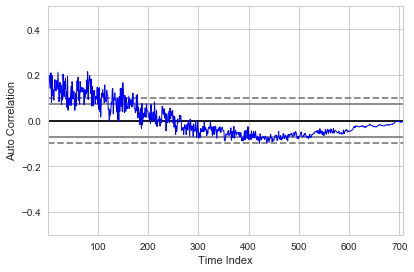

In [51]:
kwd2={'linewidth':1.0,'color':'blue'}
autocorrelation_plot(DF_2h['Service_Time'],**kwd2)
plt.xlabel('Time Index')
plt.ylabel('Auto Correlation')
plt.grid()
plt.tight_layout()
plt.ylim([-.5,.5])
plt.savefig('Singapore_autocorrlation_2agg.png')
plt.show()


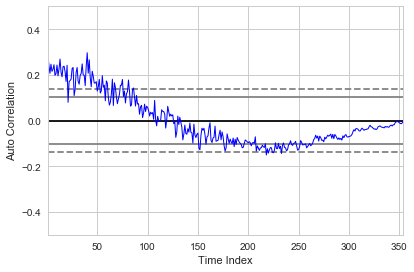

In [55]:
kwd2={'linewidth':1.0,'color':'blue'}
autocorrelation_plot(DF_4h['Service_Time'],**kwd2)
plt.xlabel('Time Index')
plt.ylabel('Auto Correlation')
plt.grid()
plt.tight_layout()
plt.ylim([-.5,.5])
plt.savefig('Singapore_autocorrlation_4agg.png')
plt.show()

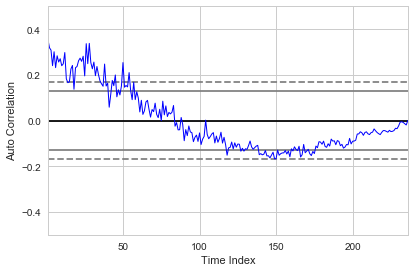

In [56]:
kwd2={'linewidth':1.0,'color':'blue'}
autocorrelation_plot(DF_6h['Service_Time'],**kwd2)
plt.xlabel('Time Index')
plt.ylabel('Auto Correlation')
plt.grid()
plt.tight_layout()
plt.ylim([-.5,.5])
plt.savefig('Singapore_autocorrlation_6agg.png')
plt.show()

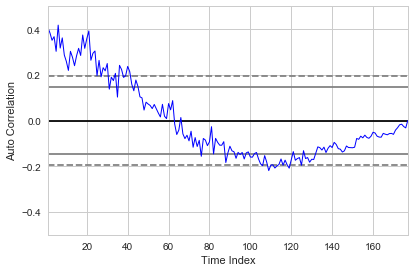

In [57]:
kwd2={'linewidth':1.0,'color':'blue'}
autocorrelation_plot(DF_8h['Service_Time'],**kwd2)
plt.xlabel('Time Index')
plt.ylabel('Auto Correlation')
plt.grid()
plt.tight_layout()
plt.ylim([-.5,.5])
plt.savefig('Singapore_autocorrlation_8agg.png')
plt.show()

In [60]:
def RegPlot(DF,title):
    sns.set_style('whitegrid') 
    sns.pairplot(data=DF, kind='reg',diag_kind="kde")
    
    

--------------------------------------------------------------------

--------------------------------------------------------------------

--------------------------------------------------------------------



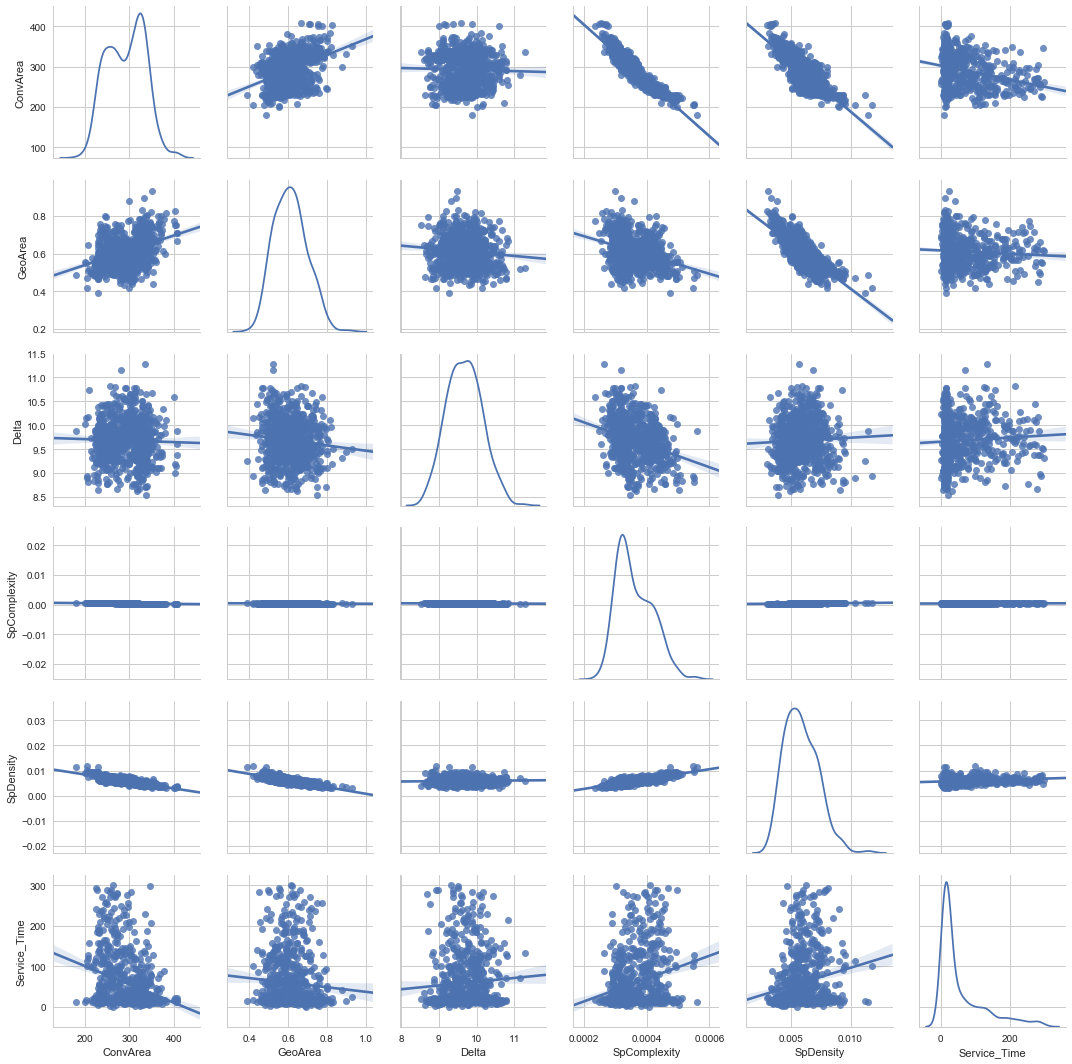

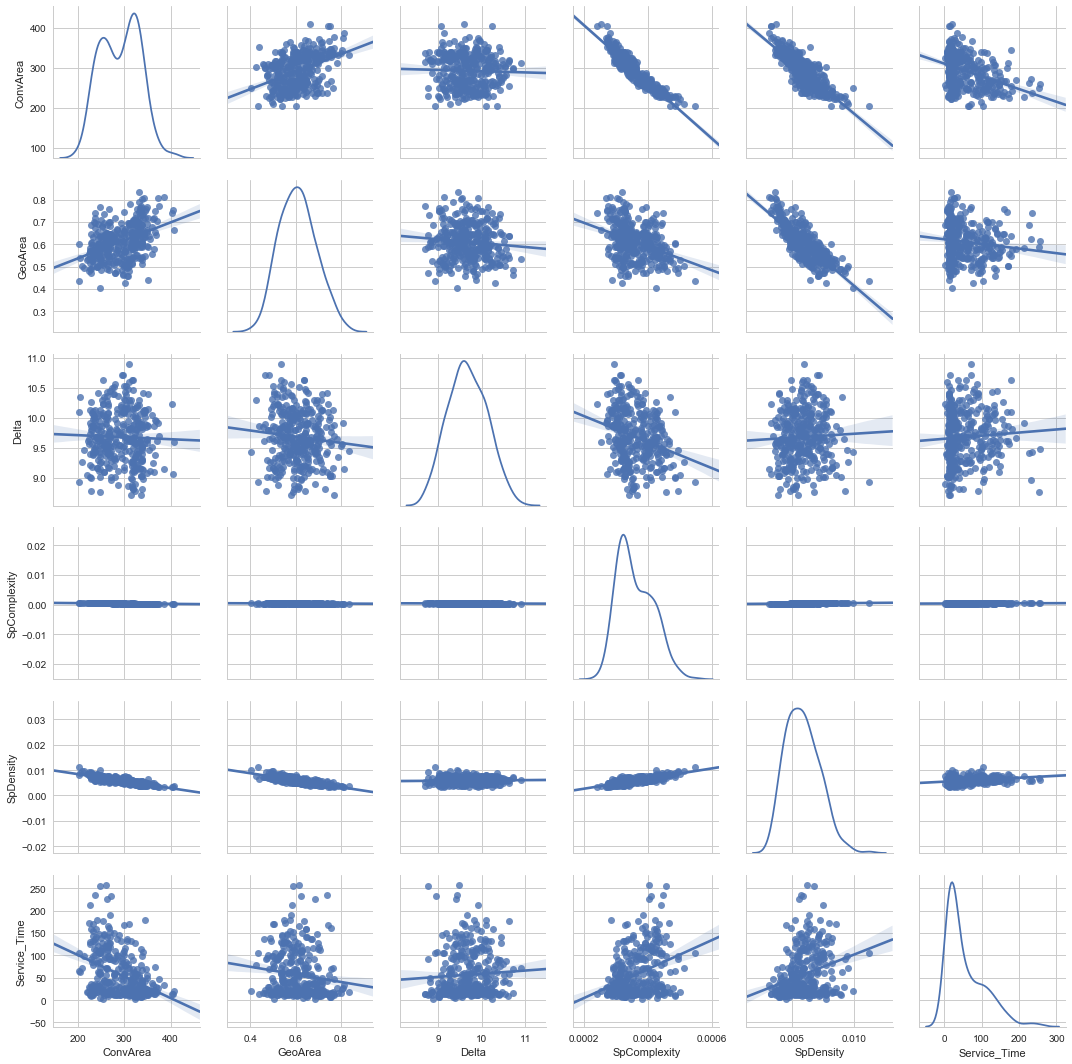

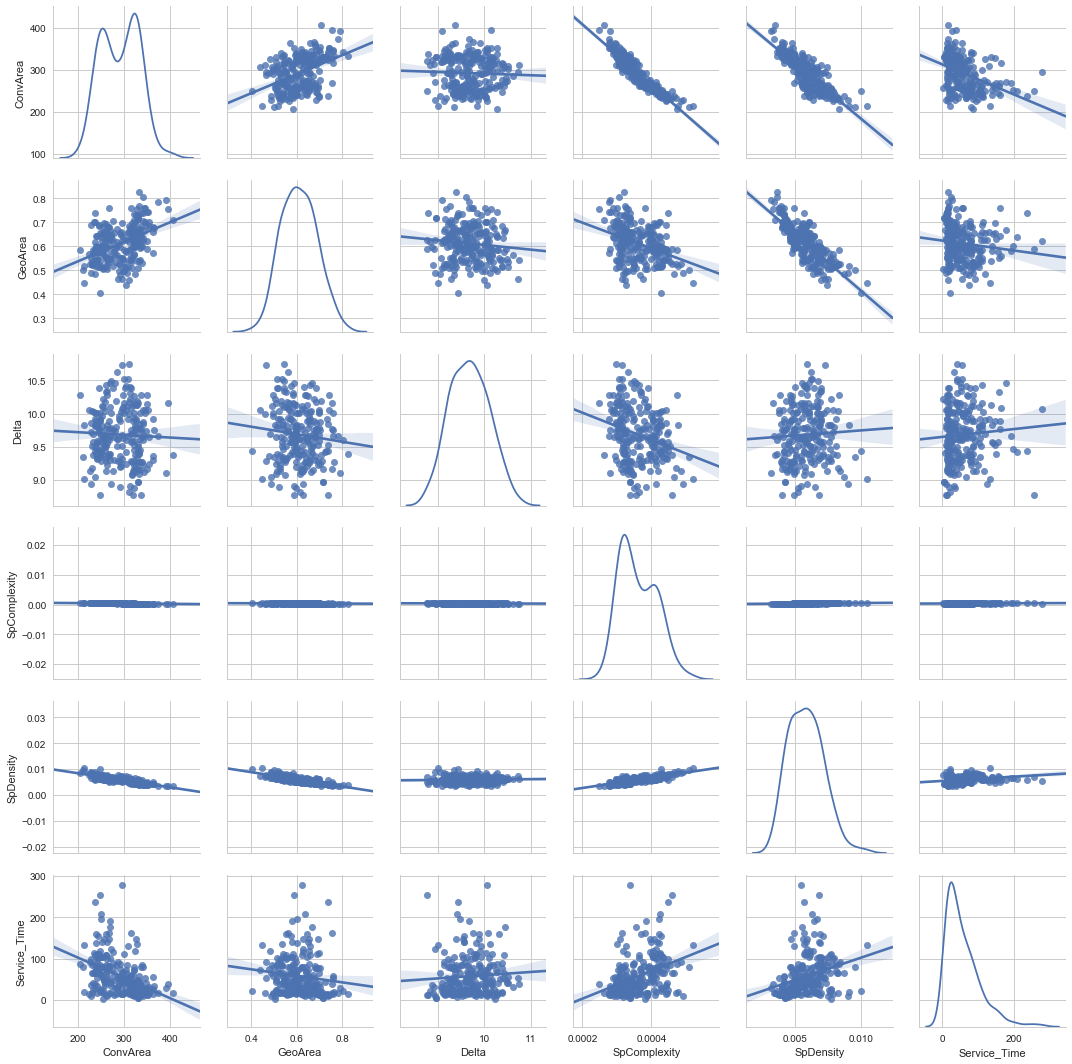

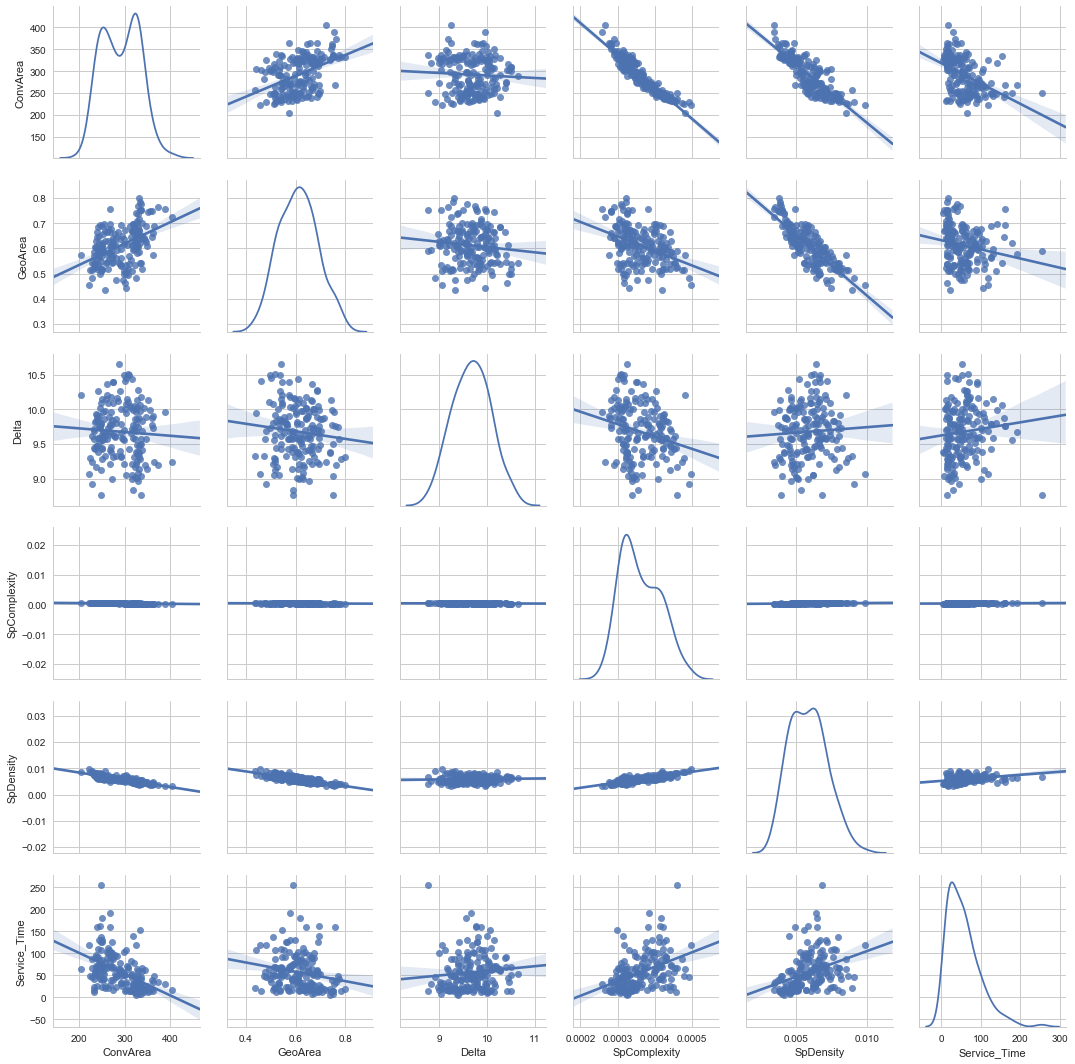

In [61]:

RegPlot(DF_2h.drop(['Month','Bucket'],axis=1),title='Two hours aggregation')
print('--------------------------------------------------------------------\n')

RegPlot(DF_4h.drop(['Month','Bucket'],axis=1),title='Four hours aggregation')
print('--------------------------------------------------------------------\n')

RegPlot(DF_6h.drop(['Month','Bucket'],axis=1),title='Six hours aggregation')

print('--------------------------------------------------------------------\n')
RegPlot(DF_8h.drop(['Month','Bucket'],axis=1),title='Eight hours aggregation')

## Multivariate LSTM Forecast Model
- Convert Time Series to Supervised 

In [378]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### Loading Data

In [379]:
PCI_Col=['ConvArea', 'GeoArea', 'Delta','SpComplexity', 'SpDensity', 'Service_Time']
DF_1h_U=DF_1h[PCI_Col]
DF_2h_U=DF_2h[PCI_Col]
DF_4h_U=DF_4h[PCI_Col]
DF_6h_U=DF_6h[PCI_Col]
DF_8h_U=DF_8h[PCI_Col]

In [380]:
DF_8h_U.head(3)

,ConvArea,GeoArea,Delta,SpComplexity,SpDensity,Service_Time
Bucket,,,,,,
1,248.848028,0.589046,8.767454,0.000458,0.006822,254.502696
2,232.508124,0.522497,9.436278,0.000456,0.008231,12.922855
3,281.771516,0.561574,9.809182,0.000362,0.006320,22.367083


### Process with Ordered Split

In [286]:
def ProcessDF_Order(DF, lag=4):
  
    # MinMaxScaling 
    # Frame Supervised 
    # Split Train Test 


      # ensure all data is float
    values = DF_8h_U.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # split into train and test sets
    train_size = int(len(scaled) * 0.67)
    test_size = len(scaled) - train_size
    train= series_to_supervised(scaled[0:train_size,:],lag,1)
    test=series_to_supervised(scaled[train_size:len(scaled),:],lag,1)

    X_train, train_y=train[train.columns[:-1]].values, train[train.columns[-1]].values
    X_test, test_y =test[test.columns[:-1]].values, test[test.columns[-1]].values
    
    
    print('=====================================')
    print (f" Training Percentage = {round (len(train_y)/len(scaled)*100,2)} %  ")
    print (f" Testing Percentage = {round (len(test_y)/len(scaled)*100,2)} %  ")
    print('=====================================')


    # reshape input to be 3D [samples, timesteps, features]
    train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    print('\n================Training and Testing input Matrix =============')
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    print('===============================================================')
    return train_X,test_X,train_y, test_y


In [400]:

def ProcessDF(DF, lag=4,rs=0):
  
    # MinMaxScaling 
    # Frame Supervised 
    # Split Train Test 


    # ensure all data is float
    values = DF.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, lag, 1)

    # split into input and outputs

    
    X_train, X_test, train_y, test_y = train_test_split(reframed[reframed.columns[:-1]].values, reframed[reframed.columns[-1]].values, test_size=0.25, random_state=rs)
    print('=====================================')
    print (f" Training Percentage = {round (len(train_y)/len(reframed)*100,2)} %  ")
    print (f" Testing Percentage = {round (len(test_y)/len(reframed)*100,2)} %  ")
    print('=====================================')


    # reshape input to be 3D [samples, timesteps, features]
    train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    print('\n================Training and Testing input Matrix =============')
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    print('===============================================================')
    return train_X,test_X,train_y, test_y


## Stateful_Model

```python

#!pip install dask --upgrade

# design network

def Define_Fit_LSTM_Stateful_Model(train_X,test_X,train_y,test_y,batch=1):
    np.random.seed(42)
    ### Define and Fit Model
    model = Sequential()
    # We will define the LSTM with 10 neurons in the first hidden layer and 1 neuron 
    # in the output layer for predicting Service Time. With 0.5 Dropout after the LSTM Layer
    model.add(LSTM(5, batch_input_shape=(batch,train_X.shape[1], train_X.shape[2]), activation='relu',stateful=True))
    #model.add(Dropout(0.25))
    #model.add(Dense(5))
    model.add(Dropout(0.25))
    model.add(Dense(1))

    '''
    Keras Regression Metrics
    Below is a list of the metrics that you can use in Keras on regression problems.

    Mean Squared Error: mean_squared_error, MSE or mse
    Mean Absolute Error: mean_absolute_error, MAE, mae
    Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
    Cosine Proximity: cosine_proximity, cosine
    '''

    # We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
    
    model.compile(loss='mse', optimizer='adam',metrics=['mse'])
    # fit network
    ''' 
    The model will be fit for 50 training epochs with a batch size of 25 and 20 epochs
    '''
    for i in range(5):
        model.fit(train_X, train_y, nb_epoch=1, batch_size=batch, verbose=0, shuffle=False)
    
    return model
    # plot history
    


def Define_Fit_LSTM_Model(train_X,test_X,train_y,test_y):
    np.random.seed(42)
    ### Define and Fit Model
    model = Sequential()
    # We will define the LSTM with 10 neurons in the first hidden layer and 1 neuron 
    # in the output layer for predicting Service Time. With 0.5 Dropout after the LSTM Layer
    model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2]), activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(5))
    model.add(Dropout(0.25))
    model.add(Dense(1))

    '''
    Keras Regression Metrics
    Below is a list of the metrics that you can use in Keras on regression problems.

    Mean Squared Error: mean_squared_error, MSE or mse
    Mean Absolute Error: mean_absolute_error, MAE, mae
    Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
    Cosine Proximity: cosine_proximity, cosine
    '''

    # We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
    
    model.compile(loss='mse', optimizer='adam',metrics=['mse'])
    # fit network
    ''' 
    The model will be fit for 50 training epochs with a batch size of 25 and 20 epochs
    '''
    history = model.fit(train_X, train_y, epochs=30, batch_size=5, validation_data=(test_X, test_y), verbose=0, shuffle=True)
    # plot history
    
    pyplot.figure(figsize=(12,10))

    kwd1={'markersize':12,'marker':'o','linewidth':3.0,'label':'Train [MSE]'}
    kwd2={'markersize':12,'marker':'d','linewidth':3.0,'label':'Test [MSE]'}
    #kwd3={'markersize':12,'marker':'*','linewidth':3.0,'label':'MSE'}
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    sns.set_style("whitegrid")
    pyplot.plot(history.history['loss'] ,**kwd1)
    pyplot.plot(history.history['val_loss'],**kwd2)
    #pyplot.plot(history.history['mean_squared_error'],**kwd3)
    pyplot.legend(loc=7,fontsize='x-large')
    pyplot.xlabel('epoch', fontsize='x-large')
    pyplot.ylabel('Mean Square Error',fontsize='x-large')
    pyplot.show()
    return history.history['loss'],history.history['val_loss'],model

```

-----------------------------------

## Evaluate the Model

### checking Model Perofrmance:
- R2-score
- MSE
- Pearson
- P-Value

-----------

In [288]:
def EvaluateModel(model,test_X,test_y):
    yhat = model.predict(test_X)
    yhat=list(yhat[:,0])
    y=list(test_y)  
    (Person, P_value) = pearsonr(y,yhat)
    print('=================================')
    print(f' MSE  = {mean_squared_error(y,yhat)}')
    print(f' R-Squared = {r2_score(y,yhat)}')
    print(f' Pearson = {Person}')
    print(f' P-value = {P_value}')
    print('=================================')
    h = sns.jointplot(np.array(y), np.array(yhat),kind='reg',size=10)

    # JointGrid has a convenience function
    h.set_axis_labels('x', 'y', fontsize=16)

    # or set labels via the axes objects
    h.ax_joint.set_xlabel('Actual Service Time', fontweight='bold')
    h.ax_joint.set_ylabel('Predicted Service Time', fontweight='bold')
    # also possible to manipulate the histogram plots this way, e.g.
    #h.ax_marg_y.grid('on') # with ugly consequences...

    # labels appear outside of plot area, so auto-adjust
    plt.tight_layout()
    
    plt.show()
    
    plt.figure(figsize=(10,10))
    h2 = sns.distplot((np.array(y)- np.array(yhat)),bins=10)
    # or set labels via the axes objects
    h2.set_xlabel('Error', fontweight='bold')
    h2.set_ylabel('PDF', fontweight='bold')
    plt.show()
   

-------------------

In [414]:

def Define_Fit_LSTM_Model(train_X,test_X,train_y,test_y,name='2haggreg'):
    np.random.seed(42)
    ### Define and Fit Model
    model = Sequential()
    # We will define the LSTM with 10 neurons in the first hidden layer and 1 neuron 
    # in the output layer for predicting Service Time. With 0.5 Dropout after the LSTM Layer
    model.add(LSTM(No_units, input_shape=(train_X.shape[1], train_X.shape[2]), activation=lstm_activation,dropout=.2, 
recurrent_dropout=.2, bias_initializer='glorot_normal'))
    model.add(Dense(5,activation='relu',use_bias=False))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='relu',use_bias=False))

    '''
    Keras Regression Metrics
    Below is a list of the metrics that you can use in Keras on regression problems.

    Mean Squared Error: mean_squared_error, MSE or mse
    Mean Absolute Error: mean_absolute_error, MAE, mae
    Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
    Cosine Proximity: cosine_proximity, cosine
    '''

    # We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
    
    model.compile(loss='mse', optimizer='adam',metrics=['mse'])
    # fit network
    ''' 
    The model will be fit for 50 training epochs with a batch size of 25 and 20 epochs
    '''
    history = model.fit(train_X, train_y, epochs=N_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=True)
    # plot history
    
    pyplot.figure(figsize=(12,10))

    kwd1={'markersize':8,'marker':'o','linewidth':2,'label':'Train [MSE]'}
    kwd2={'markersize':8,'marker':'d','linewidth':2,'label':'Test [MSE]'}
    #kwd3={'markersize':12,'marker':'*','linewidth':3.0,'label':'MSE'}
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    sns.set_style("whitegrid")
    pyplot.plot(history.history['loss'] ,**kwd1)
    pyplot.plot(history.history['val_loss'],**kwd2)
    #pyplot.plot(history.history['mean_squared_error'],**kwd3)
    pyplot.legend(loc=7,fontsize='x-large')
    pyplot.xlabel('epoch', fontsize='x-large')
    pyplot.ylabel('Mean Square Error',fontsize='x-large')
    pyplot.savefig(f'Results/LSTM_Training_{name}.png')
    pyplot.show()
    return history.history['loss'],history.history['val_loss'],model



### 2 Hours Aggregation with 4 Lag Model 

 Training Percentage = 75.0 %  
 Testing Percentage = 25.0 %  

================Training and Testing input Matrix =============
(528, 1, 29) (528,) (176, 1, 29) (176,)


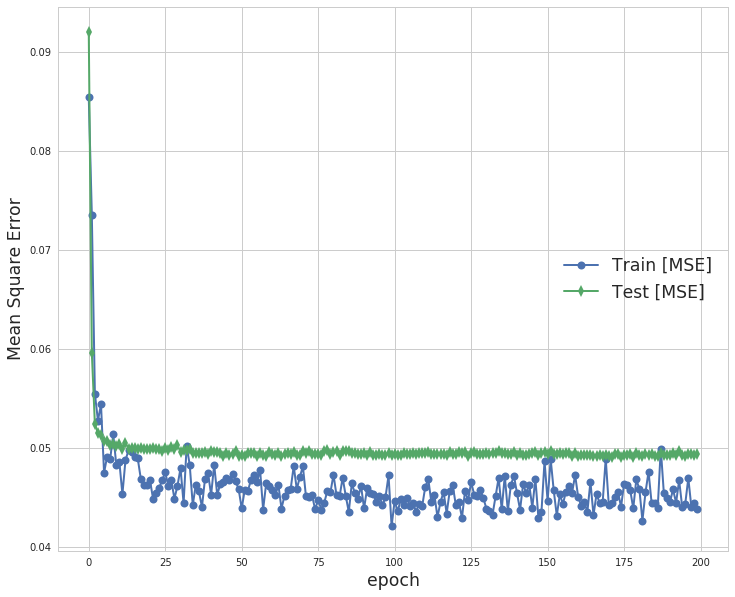

 MSE  = 0.049443824929221836
 R-Squared = 0.09260698683439272
 Pearson = 0.31436313736902805
 P-value = 2.1472117861080295e-05


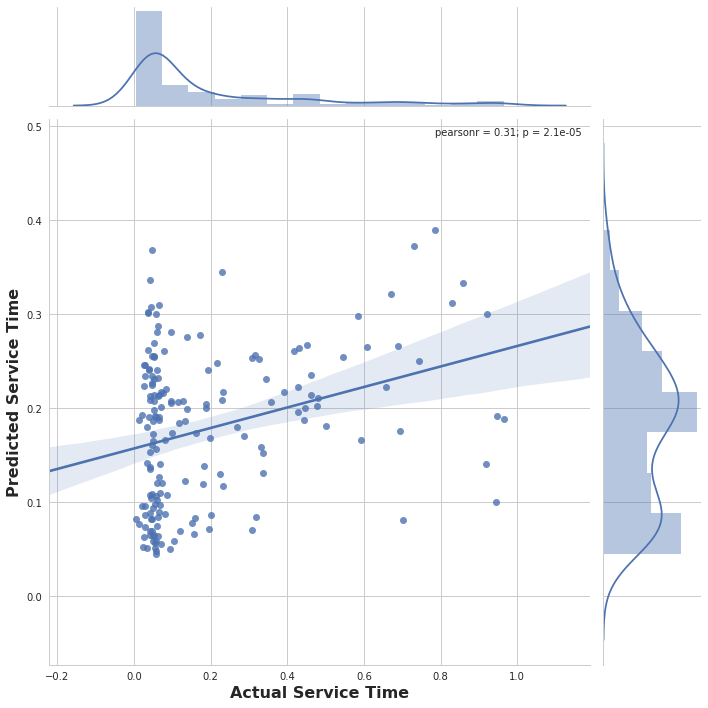

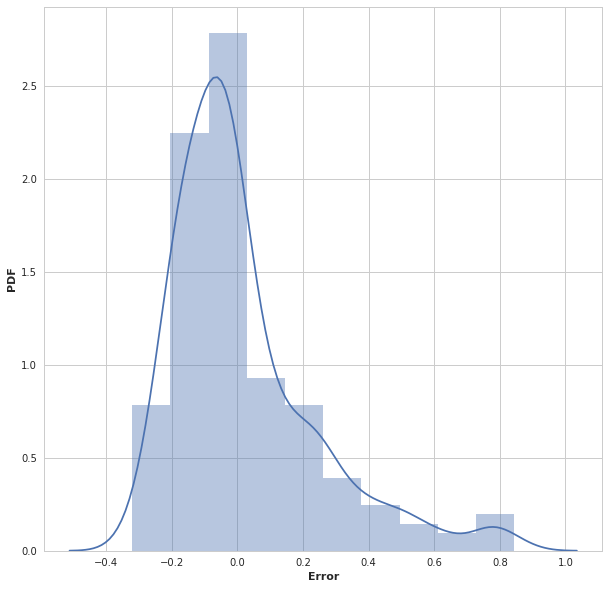

In [419]:
No_units=5
lstm_activation='tanh'
batch_size=20
N_epochs=200
recurrent_activation='hard_sigmoid'
use_bias=True, 
kernel_initializer='glorot_uniform', 
recurrent_initializer='orthogonal', 
bias_initializer='zeros', 
dropout=0.2, 
recurrent_dropout=0.2
Random_seed=77
Data_in=DF_2h_U # Aggrgation 
name='2haggreg'
Num_Lags=4

np.random.seed(0)
### Prepare the input Matrix and select the proper Lagging 
train_X,test_X,train_y, #test_y=ProcessDF(DF_2h_U[:int(len(DF_8h_U)*3/4)],lag=2,rs=42)
train_X,test_X,train_y, test_y=ProcessDF(Data_in,lag=Num_Lags,rs=Random_seed)
### Getting the train and test the model 
Test_MSE,Train_MSE,model=Define_Fit_LSTM_Model(train_X,test_X,train_y,test_y,name)
## Evaluate the model 
EvaluateModel(model,test_X,test_y)


#train_X,test_X,train_y, test_y=ProcessDF_Order(DF_2h_U,lag=2)

#model=Define_Fit_LSTM_Stateful_Model(train_X,test_X,train_y,test_y,batch=1)

## Evaluate the model 
#EvaluateModel(model,test_X,test_y)

### 4 Hours Aggregation with 4 Lag Model 

 Training Percentage = 74.86 %  
 Testing Percentage = 25.14 %  

================Training and Testing input Matrix =============
(262, 1, 29) (262,) (88, 1, 29) (88,)


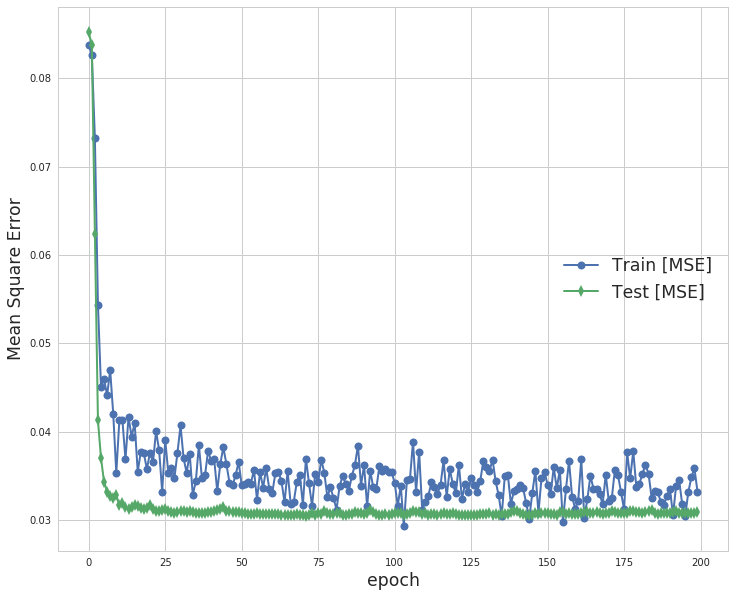

 MSE  = 0.030881639508659933
 R-Squared = 0.2000552670929301
 Pearson = 0.45024618383836085
 P-value = 1.0753831790194946e-05


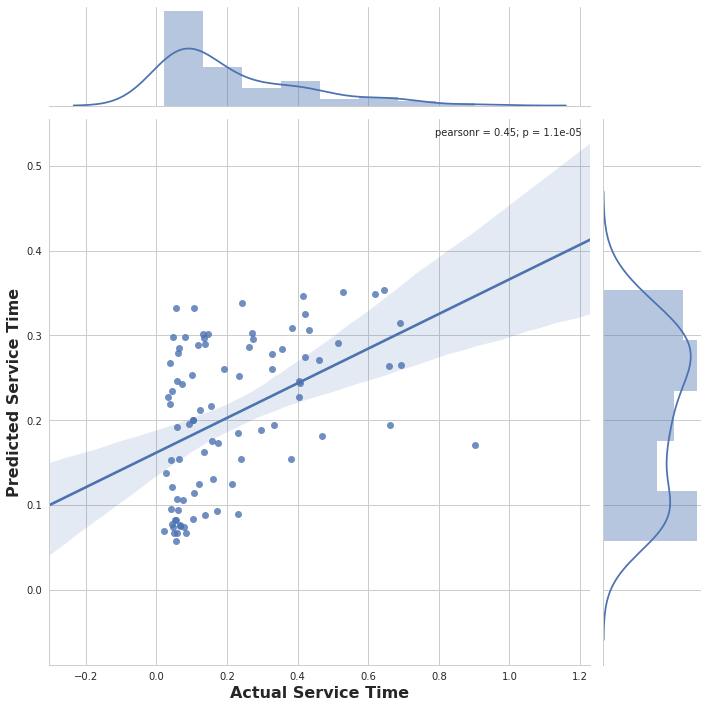

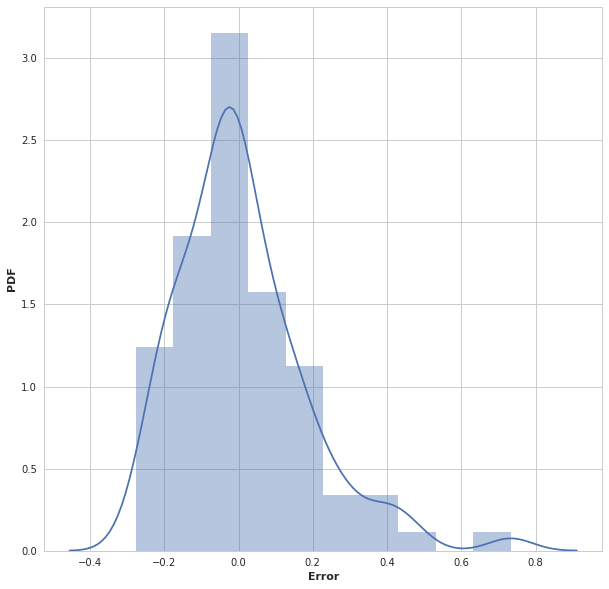

In [416]:
No_units=5
lstm_activation='tanh'
batch_size=20
N_epochs=200
recurrent_activation='hard_sigmoid'
use_bias=True, 
kernel_initializer='glorot_uniform', 
recurrent_initializer='orthogonal', 
bias_initializer='zeros', 
dropout=0.0, 
recurrent_dropout=0.0
Random_seed=77
Data_in=DF_4h_U # Aggrgation 
name='4haggreg'
Num_Lags=4

np.random.seed(0)
### Prepare the input Matrix and select the proper Lagging 
train_X,test_X,train_y, #test_y=ProcessDF(DF_2h_U[:int(len(DF_8h_U)*3/4)],lag=2,rs=42)
train_X,test_X,train_y, test_y=ProcessDF(Data_in,lag=Num_Lags,rs=Random_seed)
### Getting the train and test the model 
Test_MSE,Train_MSE,model=Define_Fit_LSTM_Model(train_X,test_X,train_y,test_y,name)
## Evaluate the model 
EvaluateModel(model,test_X,test_y)


#train_X,test_X,train_y, test_y=ProcessDF_Order(DF_2h_U,lag=2)

#model=Define_Fit_LSTM_Stateful_Model(train_X,test_X,train_y,test_y,batch=1)

## Evaluate the model 
#EvaluateModel(model,test_X,test_y)

### 6 Hours Aggregation with 4 Lag Model 

 Training Percentage = 75.0 %  
 Testing Percentage = 25.0 %  

================Training and Testing input Matrix =============
(174, 1, 29) (174,) (58, 1, 29) (58,)


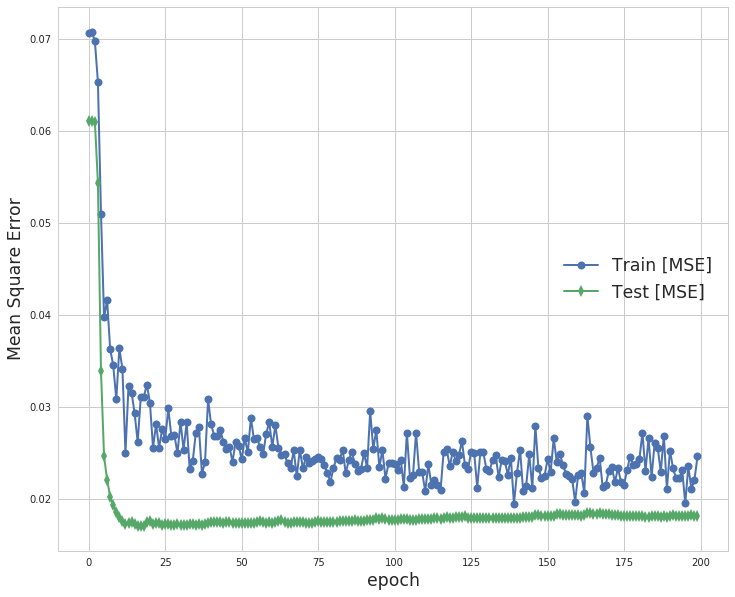

 MSE  = 0.01809147819507849
 R-Squared = 0.3139646096587655
 Pearson = 0.5613108312802442
 P-value = 4.568587302417047e-06


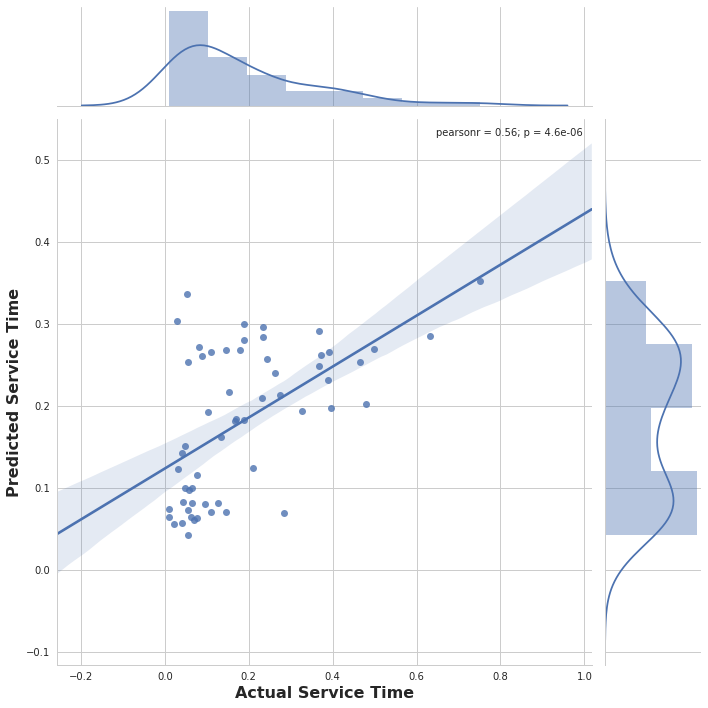

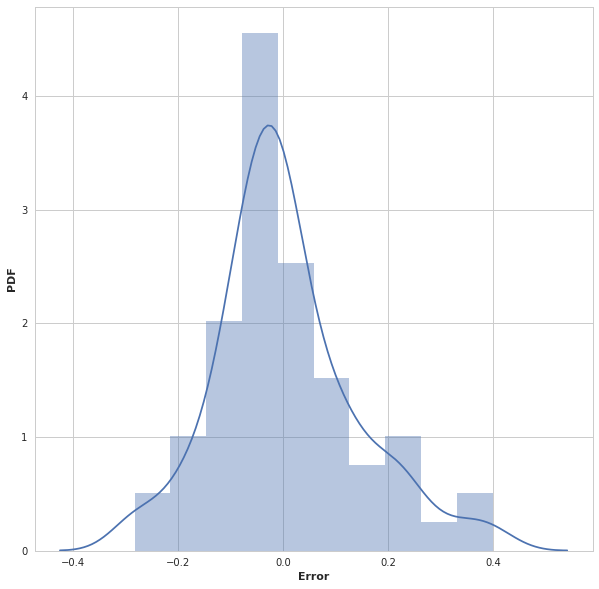

In [417]:
No_units=5
lstm_activation='tanh'
batch_size=20
N_epochs=200
recurrent_activation='hard_sigmoid'
use_bias=True, 
kernel_initializer='glorot_uniform', 
recurrent_initializer='orthogonal', 
bias_initializer='zeros', 
dropout=0.0, 
recurrent_dropout=0.0
Random_seed=77
Data_in=DF_6h_U # Aggrgation 
name='6haggreg'
Num_Lags=4

np.random.seed(0)
### Prepare the input Matrix and select the proper Lagging 
train_X,test_X,train_y, #test_y=ProcessDF(DF_2h_U[:int(len(DF_8h_U)*3/4)],lag=2,rs=42)
train_X,test_X,train_y, test_y=ProcessDF(Data_in,lag=Num_Lags,rs=Random_seed)
### Getting the train and test the model 
Test_MSE,Train_MSE,model=Define_Fit_LSTM_Model(train_X,test_X,train_y,test_y,name)
## Evaluate the model 
EvaluateModel(model,test_X,test_y)


#train_X,test_X,train_y, test_y=ProcessDF_Order(DF_2h_U,lag=2)

#model=Define_Fit_LSTM_Stateful_Model(train_X,test_X,train_y,test_y,batch=1)

## Evaluate the model 
#EvaluateModel(model,test_X,test_y)

### 8 Hours Aggregation with 4 Lag Model 

 Training Percentage = 74.57 %  
 Testing Percentage = 25.43 %  

================Training and Testing input Matrix =============
(129, 1, 29) (129,) (44, 1, 29) (44,)


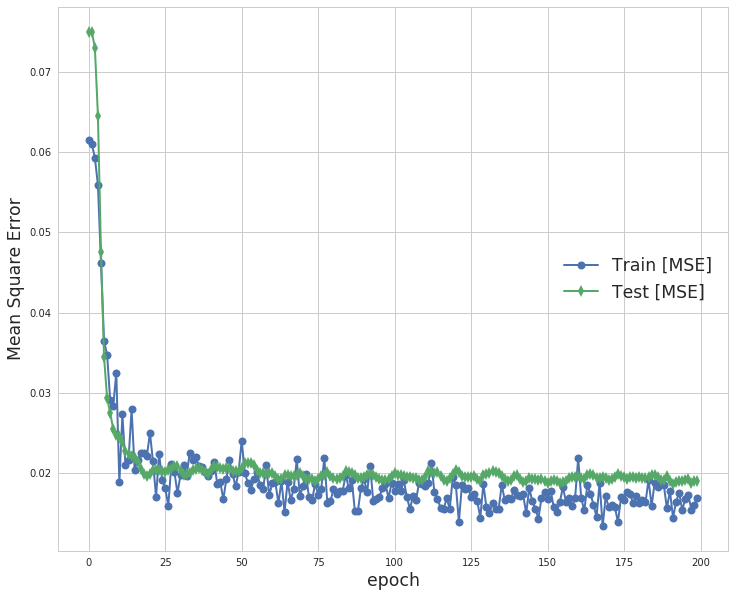

 MSE  = 0.019055461446606983
 R-Squared = 0.4509572810198136
 Pearson = 0.7553853305851749
 P-value = 3.1071967518297405e-09


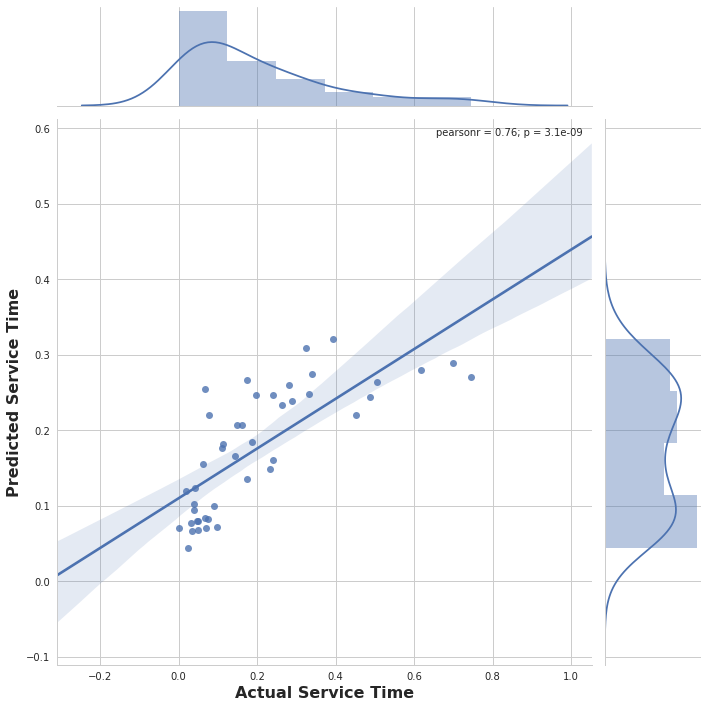

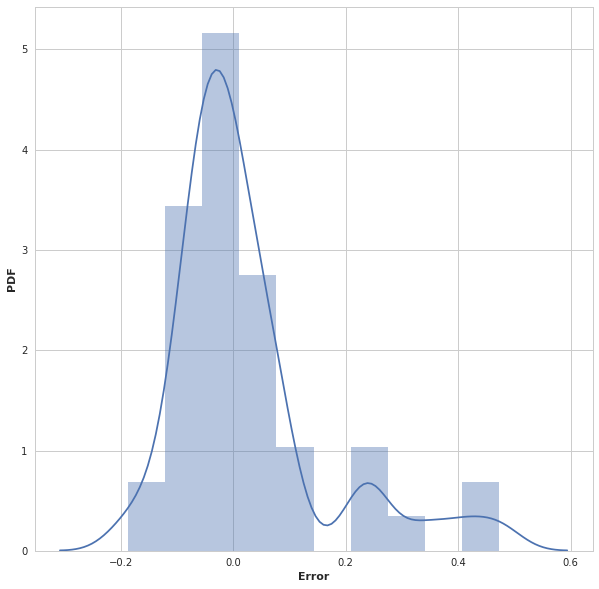

In [418]:
No_units=5
lstm_activation='tanh'
batch_size=20
N_epochs=200
recurrent_activation='hard_sigmoid'
use_bias=True, 
kernel_initializer='glorot_uniform', 
recurrent_initializer='orthogonal', 
bias_initializer='zeros', 
dropout=0.0, 
recurrent_dropout=0.0
Random_seed=77
Data_in=DF_8h_U # Aggrgation 
name='8haggreg'
Num_Lags=4

np.random.seed(0)
### Prepare the input Matrix and select the proper Lagging 
train_X,test_X,train_y, #test_y=ProcessDF(DF_2h_U[:int(len(DF_8h_U)*3/4)],lag=2,rs=42)
train_X,test_X,train_y, test_y=ProcessDF(Data_in,lag=Num_Lags,rs=Random_seed)
### Getting the train and test the model 
Test_MSE,Train_MSE,model=Define_Fit_LSTM_Model(train_X,test_X,train_y,test_y,name)
## Evaluate the model 
EvaluateModel(model,test_X,test_y)


#train_X,test_X,train_y, test_y=ProcessDF_Order(DF_2h_U,lag=2)

#model=Define_Fit_LSTM_Stateful_Model(train_X,test_X,train_y,test_y,batch=1)

## Evaluate the model 
#EvaluateModel(model,test_X,test_y)

------------------------------

### The End